In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('data_new.csv')
df_old=pd.read_csv('data.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df_old.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
np.average(df_old['Present_Price']-df_old['Selling_Price'])

2.967176079734219

In [9]:
df['present_price']=df['selling_price']+300000

In [10]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,present_price
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,360000
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,435000
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,900000
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,550000
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,750000


In [11]:
df.corr()

,year,selling_price,km_driven,present_price
year,1.000000,0.413922,-0.419688,0.413922
selling_price,0.413922,1.000000,-0.192289,1.000000
km_driven,-0.419688,-0.192289,1.000000,-0.192289
present_price,0.413922,1.000000,-0.192289,1.000000


In [14]:
for i in df.columns[4:8]:
    print(df[i].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [15]:
df.describe()

,year,selling_price,km_driven,present_price
count,4340.000000,4.340000e+03,4340.000000,4.340000e+03
mean,2013.090783,5.041273e+05,66215.777419,8.041273e+05
std,4.215344,5.785487e+05,46644.102194,5.785487e+05
min,1992.000000,2.000000e+04,1.000000,3.200000e+05
25%,2011.000000,2.087498e+05,35000.000000,5.087498e+05
50%,2014.000000,3.500000e+05,60000.000000,6.500000e+05
75%,2016.000000,6.000000e+05,90000.000000,9.000000e+05
max,2020.000000,8.900000e+06,806599.000000,9.200000e+06


In [16]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
present_price    0
dtype: int64

In [17]:
df['year']=2020-df['year']
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,present_price
0,Maruti 800 AC,13,60000,70000,Petrol,Individual,Manual,First Owner,360000
1,Maruti Wagon R LXI Minor,13,135000,50000,Petrol,Individual,Manual,First Owner,435000
2,Hyundai Verna 1.6 SX,8,600000,100000,Diesel,Individual,Manual,First Owner,900000
3,Datsun RediGO T Option,3,250000,46000,Petrol,Individual,Manual,First Owner,550000
4,Honda Amaze VX i-DTEC,6,450000,141000,Diesel,Individual,Manual,Second Owner,750000


In [18]:
df.drop(['name'],axis=1,inplace=True)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,present_price
0,13,60000,70000,Petrol,Individual,Manual,First Owner,360000
1,13,135000,50000,Petrol,Individual,Manual,First Owner,435000
2,8,600000,100000,Diesel,Individual,Manual,First Owner,900000
3,3,250000,46000,Petrol,Individual,Manual,First Owner,550000
4,6,450000,141000,Diesel,Individual,Manual,Second Owner,750000


In [19]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,year,selling_price,km_driven,present_price,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,13,60000,70000,360000,0,0,0,1,1,0,1,0,0,0,0
1,13,135000,50000,435000,0,0,0,1,1,0,1,0,0,0,0
2,8,600000,100000,900000,1,0,0,0,1,0,1,0,0,0,0
3,3,250000,46000,550000,0,0,0,1,1,0,1,0,0,0,0
4,6,450000,141000,750000,1,0,0,0,1,0,1,0,1,0,0


In [20]:
df.corr()

,year,selling_price,km_driven,present_price,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
year,1.000000,-0.413922,0.419688,-0.413922,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
selling_price,-0.413922,1.000000,-0.192289,1.000000,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
km_driven,0.419688,-0.192289,1.000000,-0.192289,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
present_price,-0.413922,1.000000,-0.192289,1.000000,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
fuel_Diesel,-0.121424,0.282947,0.285396,0.282947,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,0.025540,-0.005095,-0.001372,-0.005095,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,0.051266,-0.042434,0.036652,-0.042434,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,0.114908,-0.269453,-0.291139,-0.269453,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,0.173703,-0.236798,0.182663,-0.236798,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,-0.100225,0.110176,-0.089858,0.110176,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578


<AxesSubplot:>

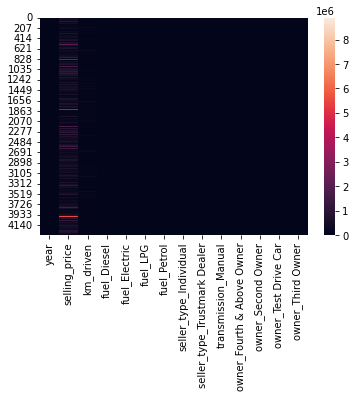

In [9]:
sns.heatmap(df)

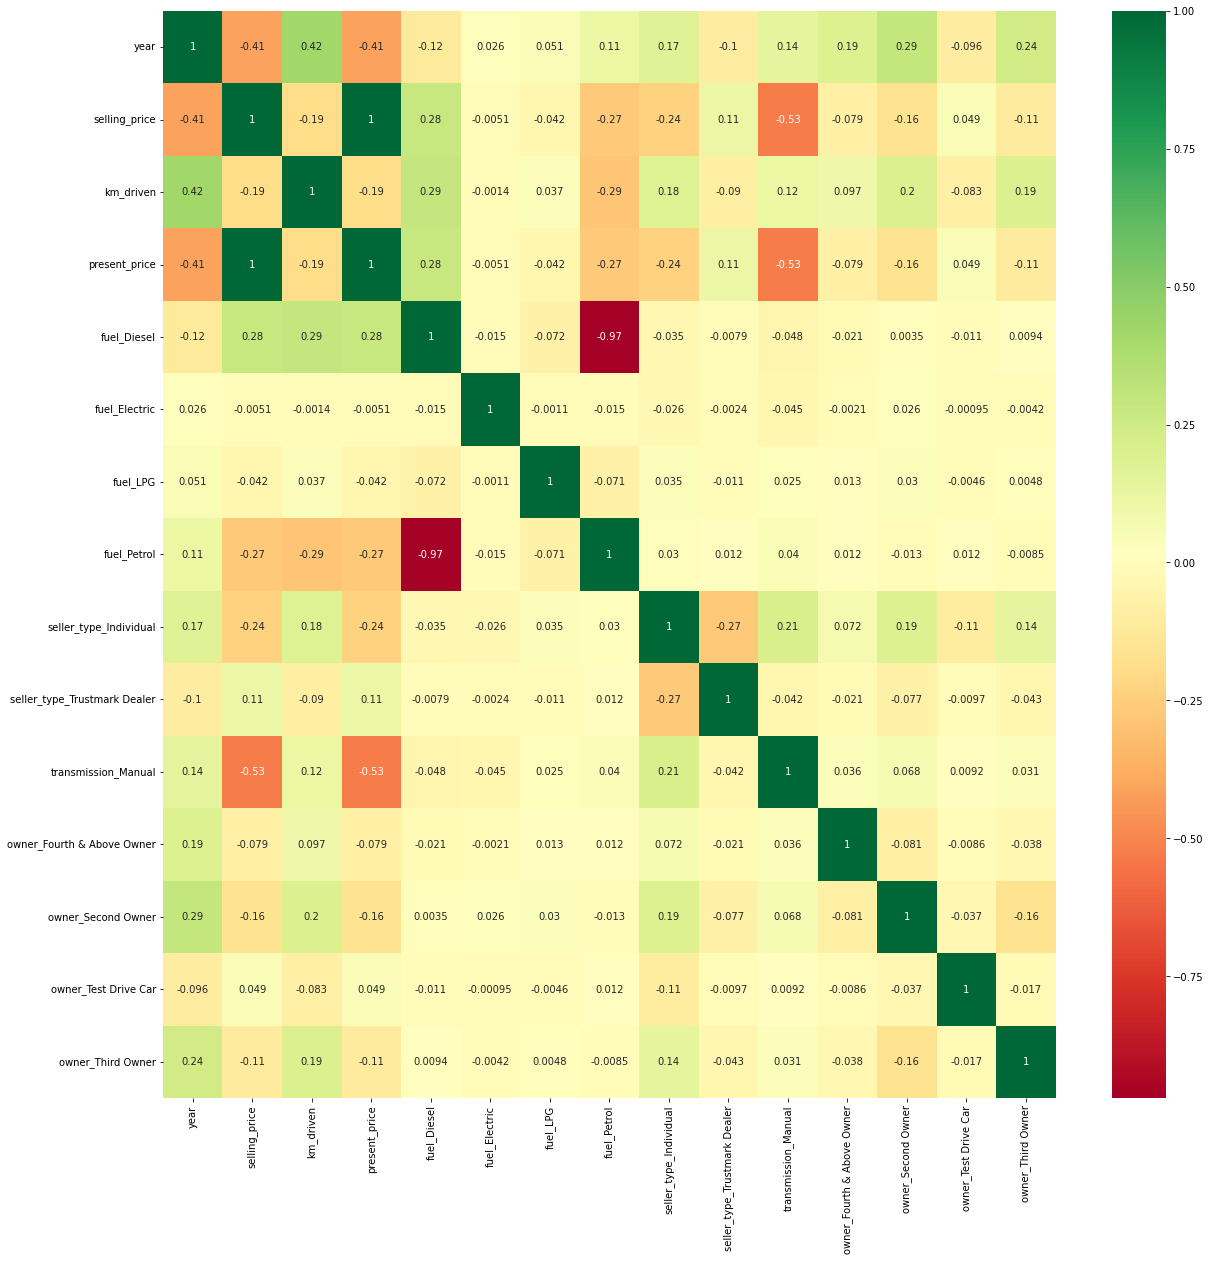

In [21]:
corrmat=df.corr()
top_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_features].corr(),annot=True,cmap='RdYlGn')

In [22]:
y=df['selling_price']
df.drop('selling_price',axis=1,inplace=True)
X=df

In [23]:
X.head()

,year,km_driven,present_price,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,13,70000,360000,0,0,0,1,1,0,1,0,0,0,0
1,13,50000,435000,0,0,0,1,1,0,1,0,0,0,0
2,8,100000,900000,1,0,0,0,1,0,1,0,0,0,0
3,3,46000,550000,0,0,0,1,1,0,1,0,0,0,0
4,6,141000,750000,1,0,0,0,1,0,1,0,1,0,0


In [24]:
X.columns

Index(['year', 'km_driven', 'present_price', 'fuel_Diesel', 'fuel_Electric',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [46]:
X=X.rename(columns={'owner_Fourth & Above Owner':'owner_Fourth_Above_Owner','owner_Second Owner':'owner_Second_Owner','owner_Test Drive Car':'owner_Test_Drive_Car','owner_Third Owner':'owner_Third_Owner','seller_type_Trustmark Dealer':'seller_type_Trustmark_Dealer'})

In [47]:
X.columns

Index(['year', 'km_driven', 'present_price', 'fuel_Diesel', 'fuel_Electric',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark_Dealer', 'transmission_Manual',
       'owner_Fourth_Above_Owner', 'owner_Second_Owner',
       'owner_Test_Drive_Car', 'owner_Third_Owner'],
      dtype='object')

In [48]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

In [49]:
X.head()

,year,km_driven,present_price,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark_Dealer,transmission_Manual,owner_Fourth_Above_Owner,owner_Second_Owner,owner_Test_Drive_Car,owner_Third_Owner
0,13,70000,360000,0,0,0,1,1,0,1,0,0,0,0
1,13,50000,435000,0,0,0,1,1,0,1,0,0,0,0
2,8,100000,900000,1,0,0,0,1,0,1,0,0,0,0
3,3,46000,550000,0,0,0,1,1,0,1,0,0,0,0
4,6,141000,750000,1,0,0,0,1,0,1,0,1,0,0


In [50]:
#feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [51]:
print(model.feature_importances_)

[1.51426036e-02 2.15854996e-03 7.94527623e-01 3.38887168e-02
 3.66610594e-07 1.44516160e-07 1.81289084e-04 1.43817802e-03
 4.84901663e-04 1.51967256e-01 3.13768361e-07 1.96235070e-04
 1.61333495e-06 1.22086942e-05]


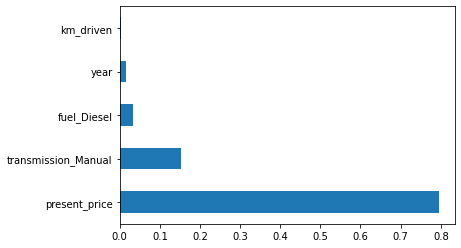

In [52]:
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
regressor=RandomForestRegressor()

In [56]:
#hyperparameter tuning
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=10,stop=1200,num=200)]
#number of features to beconsider at every split
max_features=['auto','sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start=5,stop= 60, num =15 )]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [57]:
# random grid
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
}

In [58]:
from sklearn.model_selection import RandomizedSearchCV
rf=RandomizedSearchCV(estimator=regressor,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter = 10,cv = 5, verbose=2, random_state=30, n_jobs = 1)

In [59]:
rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=566; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=566; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=566; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=566; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=566; total time=   0.7s
[CV] END max_depth=36, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=326; total time=   0.4s
[CV] END max_depth=36, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=326; total time=   0.4s
[CV] END max_depth=36, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 8, 12, 16, 20, 24, 28,
                                                      32, 36, 40, 44, 48, 52,
                                                      56, 60],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 15, 21, 27, 33, 39,
                                                         45, 51, 57, 63, 69, 75,
                                                         81, 87, 93, 99, 105,
                                                         111, 117, 123, 129,
                                                         135, 141, 147, 153,
                      

In [60]:
rf.best_params_

{'n_estimators': 279,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 28}

In [61]:
pred=rf.predict(X_test)

C:\Users\sanit.phondke\Anaconda3\envs\cardekho\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

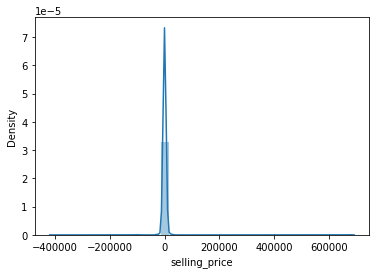

In [62]:
sns.distplot(y_test-pred)

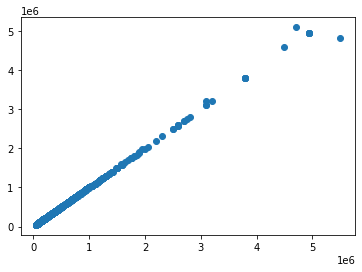

In [63]:
plt.scatter(y_test,pred)

In [64]:
from sklearn import metrics
print('MAE=',metrics.mean_absolute_error(y_test,pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE= 1435.0902251292466
MSE: 496907218.6596477
RMSE: 22291.41580653072


In [65]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model_1.pkl', 'wb')

# dump information to that file
pickle.dump(rf,file)
file.close()

In [35]:
print(file.readlines)

<built-in method readlines of _io.BufferedWriter object at 0x000002A6D9D673B0>


In [43]:
file.close()